# Q6

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import warnings
warnings.filterwarnings('ignore')

In [92]:
df = pd.read_csv("Q6Data.csv")
df.head()
#reading file as df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [93]:
df.isnull().sum()
df['Age'] = df['Age'].fillna(value=df['Age'].median())
#filling null ages with median

In [94]:
train, test = train_test_split(df, test_size=0.2)
#splitting in train and test

In [95]:
print(train.shape)
print(test.shape)

(712, 12)
(179, 12)


In [96]:
train_data = train.drop(columns=['Ticket', 'PassengerId', 'Cabin', 'Name'])
train_data.head()
#dropping columns unrelated to survival

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
283,1,3,male,19.0,0,0,8.0500,S
631,0,3,male,51.0,0,0,7.0542,S
496,1,1,female,54.0,1,0,78.2667,C
339,0,1,male,45.0,0,0,35.5000,S
506,1,2,female,33.0,0,2,26.0000,S


In [97]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 283 to 246
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  711 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


In [98]:
train_data = pd.get_dummies(train_data)
train_data.head()
#applying one_hot encoding

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
283,1,3,19.0,0,0,8.0500,0,1,0,0,1
631,0,3,51.0,0,0,7.0542,0,1,0,0,1
496,1,1,54.0,1,0,78.2667,1,0,1,0,0
339,0,1,45.0,0,0,35.5000,0,1,0,0,1
506,1,2,33.0,0,2,26.0000,1,0,0,0,1


In [99]:
test_data = test.drop(columns=['Ticket', 'PassengerId', 'Cabin', 'Name'])
test_data = pd.get_dummies(test_data)
test_data.isnull().sum()
#Doing same in test data

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [100]:
x_train = train_data.drop(columns='Survived')
x_test = test_data.drop(columns='Survived')
y_train = train_data['Survived']
y_test = test_data['Survived']
x_train.head()
#dropping survived from x as it is target and passing survived to y

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
283,3,19.0,0,0,8.0500,0,1,0,0,1
631,3,51.0,0,0,7.0542,0,1,0,0,1
496,1,54.0,1,0,78.2667,1,0,1,0,0
339,1,45.0,0,0,35.5000,0,1,0,0,1
506,2,33.0,0,2,26.0000,1,0,0,0,1


In [101]:
x_test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
38,3,18.0,2,0,18.0000,1,0,0,0,1
80,3,22.0,0,0,9.0000,0,1,0,0,1
649,3,23.0,0,0,7.5500,1,0,0,0,1
731,3,11.0,0,0,18.7875,0,1,1,0,0
795,2,39.0,0,0,13.0000,0,1,0,0,1


In [102]:
y_train.head()

283    1
631    0
496    1
339    0
506    1
Name: Survived, dtype: int64

In [103]:
y_test.head()

38     0
80     0
649    1
731    0
795    0
Name: Survived, dtype: int64

In [104]:
#Annealing.py file
import pandas as pd
import numpy as np
import random
from datetime import datetime as dt
from utils import train_model

DATA_PATH = './'
OUTPUT_PATH = './'
#  X_train = pd.read_csv(DATA_PATH + 'x_train.csv')
#     y_train = pd.read_csv(DATA_PATH + 'y_train.csv')

def simulated_annealing(X_train,
                        y_train,
                        maxiters=50,
                        alpha=0.85,
                        beta=1,
                        T_0=1,
                        update_iters=1,
                        temp_reduction='geometric'):
    """
    Function to perform feature selection using simulated annealing
    Inputs:
    X_train: Predictor features
    y_train: Train labels
    maxiters: Maximum number of iterations
    alpha: Factor to reduce temperature
    beta: Constant in probability estimate 
    T_0: Initial temperature
    update_iters: Number of iterations required to update temperature
    temp_reduction: Strategy for temperature reduction schedule
    Output:
    1) Dataframe of parameters explored and corresponding model performance
    2) Best metric score (i.e. AUC score in this case)
    3) List of subset features that correspond to the best metric
    """
    columns = ['Iteration', 'Feature Count', 'Feature Set', 
               'Metric', 'Best Metric', 'Acceptance Probability', 
               'Random Number', 'Outcome']
    print(type(maxiters))           
    results = pd.DataFrame(index=range(maxiters), columns=columns)
    best_subset = None
    hash_values = set()
    T = T_0

   

    # Get ascending range indices of all columns
    full_set = set(np.arange(len(X_train.columns)))

    # Generate initial random subset based on ~50% of columns
    curr_subset = set(random.sample(list(full_set), round(0.5 * len(full_set))))

    # Get baseline metric score (i.e. AUC) of initial random subset
    X_curr = X_train.iloc[:, list(curr_subset)]
    print(X_curr.shape)
    print(y_train.shape)
    prev_metric = train_model(X_curr, y_train)
    best_metric = prev_metric

    for i in range(maxiters):
        # Termination conditions
        if T < 0.01:
            print(f'Temperature {T} below threshold. Termination condition met')
            break
        
        print(f'Starting Iteration {i+1}')

        # Execute pertubation (i.e. alter current subset to get new subset)
        while True:
            # Decide what type of pertubation to make
            if len(curr_subset) == len(full_set): 
                move = 'Remove'
            elif len(curr_subset) == 2: # Not to go below 2 features
                move = random.choice(['Add', 'Replace'])
            else:
                move = random.choice(['Add', 'Replace', 'Remove'])
            
            # Get columns not yet used in current subset
            pending_cols = full_set.difference(curr_subset) 
            new_subset = curr_subset.copy()   

            if move == 'Add':        
                new_subset.add(random.choice(list(pending_cols)))
            elif move == 'Replace': 
                new_subset.remove(random.choice(list(curr_subset)))
                new_subset.add(random.choice(list(pending_cols)))
            else:
                new_subset.remove(random.choice(list(curr_subset)))
                
            if new_subset in hash_values:
                print('Subset already visited')
            else:
                hash_values.add(frozenset(new_subset))
                break

        # Filter dataframe to current subset
        X_new = X_train.iloc[:, list(new_subset)]

        # Get metric of new subset
        metric = train_model(X_new, y_train)

        if metric > prev_metric:
            print('Local improvement in metric from {:8.4f} to {:8.4f} '
                  .format(prev_metric, metric) + ' - New subset accepted')
            outcome = 'Improved'
            accept_prob, rnd = '-', '-'
            prev_metric = metric
            curr_subset = new_subset.copy()

            # Keep track of overall best metric so far
            if metric > best_metric:
                print('Global improvement in metric from {:8.4f} to {:8.4f} '
                      .format(best_metric, metric) + ' - Best subset updated')
                best_metric = metric
                best_subset = new_subset.copy()
                
        else:
            rnd = np.random.uniform()
            diff = prev_metric - metric
            accept_prob = np.exp(-beta * diff / T)

            if rnd < accept_prob:
                print('New subset has worse performance but still accept. Metric change' +
                      ':{:8.4f}, Acceptance probability:{:6.4f}, Random number:{:6.4f}'
                      .format(diff, accept_prob, rnd))
                outcome = 'Accept'
                prev_metric = metric
                curr_subset = new_subset.copy()
            else:
                print('New subset has worse performance, therefore reject. Metric change' +
                      ':{:8.4f}, Acceptance probability:{:6.4f}, Random number:{:6.4f}'
                      .format(diff, accept_prob, rnd))
                outcome = 'Reject'

        # Update results dataframe
        results.loc[i, 'Iteration'] = i+1
        results.loc[i, 'Feature Count'] = len(curr_subset)
        results.loc[i, 'Feature Set'] = sorted(curr_subset)
        results.loc[i, 'Metric'] = metric
        results.loc[i, 'Best Metric'] = best_metric
        results.loc[i, 'Acceptance Probability'] = accept_prob
        results.loc[i, 'Random Number'] = rnd
        results.loc[i, 'Outcome'] = outcome

        # Temperature cooling schedule
        if i % update_iters == 0:
            if temp_reduction == 'geometric':
                T = alpha * T
            elif temp_reduction == 'linear':
                T -= alpha
            elif temp_reduction == 'slow decrease':
                b = 5 # Arbitrary constant
                T = T / (1 + b * T)
            else:
                raise Exception("Temperature reduction strategy not recognized")

    # Convert column indices of best subset to original names
    best_subset_cols = [list(X_train.columns)[i] for i in list(best_subset)]

    # Drop NaN rows in results
    results = results.dropna(axis=0, how='all')

    # Save results as CSV
    dt_string = dt.now().strftime("%Y%m%d_%H%M%S")
    results.to_csv(f'{OUTPUT_PATH}/sa_output_{dt_string}.csv', index=False)

    return results, best_metric, best_subset_cols


In [105]:
x_train.shape

(712, 10)

In [106]:
y_train.shape

(712,)

In [107]:
results, best_metric, best_subset_cols = simulated_annealing(x_train, y_train)
#Applying Annealing 

<class 'int'>
(712, 5)
(712,)
Starting Iteration 1
Local improvement in metric from   0.8210 to   0.8260  - New subset accepted
Global improvement in metric from   0.8210 to   0.8260  - Best subset updated
Starting Iteration 2
New subset has worse performance but still accept. Metric change:  0.0080, Acceptance probability:0.9906, Random number:0.8120
Starting Iteration 3
New subset has worse performance but still accept. Metric change:  0.0020, Acceptance probability:0.9972, Random number:0.1858
Starting Iteration 4
Local improvement in metric from   0.8160 to   0.8250  - New subset accepted
Starting Iteration 5
New subset has worse performance but still accept. Metric change:  0.0350, Acceptance probability:0.9351, Random number:0.9317
Starting Iteration 6
Local improvement in metric from   0.7900 to   0.7950  - New subset accepted
Starting Iteration 7
New subset has worse performance but still accept. Metric change:  0.0050, Acceptance probability:0.9868, Random number:0.1256
Starti

In [108]:
print(results)

   Iteration Feature Count            Feature Set Metric Best Metric  \
0          1             4           [0, 3, 5, 8]  0.826       0.826   
1          2             4           [0, 1, 3, 5]  0.818       0.826   
2          3             5        [0, 1, 2, 3, 5]  0.816       0.826   
3          4             4           [0, 2, 3, 5]  0.825       0.826   
4          5             3              [2, 3, 5]   0.79       0.826   
5          6             2                 [3, 5]  0.795       0.826   
6          7             3              [3, 5, 9]   0.79       0.826   
7          8             4           [0, 3, 5, 9]  0.815       0.826   
8          9             4           [3, 5, 8, 9]   0.81       0.826   
9         10             5        [1, 3, 5, 8, 9]  0.785       0.826   
10        11             5        [1, 3, 5, 8, 9]  0.657       0.826   
11        12             4           [1, 5, 8, 9]   0.77       0.826   
12        13             3              [1, 5, 8]  0.774       0

In [109]:
print(best_subset_cols)

['Pclass', 'Age', 'Fare', 'Sex_female', 'Embarked_Q', 'Embarked_S']


In [110]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
model = make_pipeline(StandardScaler(), SVC(gamma='auto'))
model.fit(x_train[['Pclass', 'Age', 'SibSp', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_S']], y_train)
y_train_pred = model.predict(x_train[['Pclass', 'Age', 'SibSp', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_S']])    
y_test_pred = model.predict(x_test[['Pclass', 'Age', 'SibSp', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_S']]) 
y_test_pred
#training an svm using best features

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1], dtype=int64)

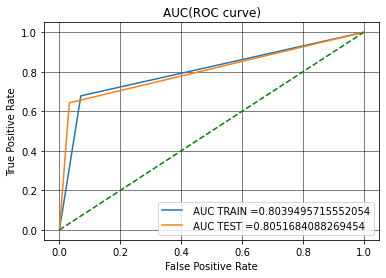

In [111]:
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()
#making roc curve out of best features

In [112]:
# This approach is initially not greedy, when the temperature is high. In this phase, it tolerates worse solutions 
# in the hope of escaping the local minima. After each iteration, as the temperature decreases, 
# it becomes more and more greedy, and ultimately looks to converge.
# A completely greedy approach never accepts a poorer solution and hence gets stuck in the local minima, unlike simulated annealing